In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import gcd

In [11]:
cutoff = 10
xvals = []
totalList = []
for p in range(1,21):
    q = 20
    gcdVal = gcd(p,q)
    p = p // gcdVal
    q = q // gcdVal
    hist = np.load('rawData/data_'+str(p)+'_'+str(q)+'.npy')
    pruned_hist = [i for i in hist if abs(i) < cutoff]
    xvals = xvals + [(p+0.0)/q for i in range(len(pruned_hist))]
    totalList = totalList + pruned_hist

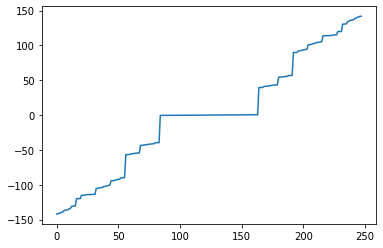

In [38]:
hist = np.load('rawData/data_7_10.npy')
pruned_hist = np.sort([i for i in hist if abs(i) < cutoff])
plt.plot(pruned_hist)

In [ ]:
hist = np.load('rawData/data_3_20.npy')

In [53]:
# create Wannier Diagram

gapCutoff = 0.5
cutoff = 150

fluxPoints = []
densityPoints = []
chernVals = []
qPoints = []
pPoints = []

for pp in range(1,11):
    q = 10
    gcdVal = gcd(pp, q)
    p = pp//gcdVal
    q = q//gcdVal
    
    hist = np.load('rawData/data_'+str(p)+'_'+str(q)+'.npy')
    pruned_hist = np.array(np.sort([i for i in hist if abs(i) < cutoff]))
    gapIndices = [i for (i,val) in enumerate(np.diff(pruned_hist)) if val > gapCutoff]
    
    center = len(pruned_hist)//2 # assuming chiral symmety here!
    
    flux = p/q  
    
    if q == 20:
        numPointsPerBand = 1
    elif q == 10:
        numPointsPerBand = 4
    elif q == 5:
        numPointsPerBand = 16    
    else:
        numPointsPerBand = 100

    for location in gapIndices:
        density = (location - center+1) / numPointsPerBand
        densityPoints.append(density)
        fluxPoints.append(flux)
        pPoints.append(p)
        qPoints.append(q)

In [54]:
query=np.array([densityPoints, pPoints, qPoints]).T

In [62]:
query[0]

array([-29.5,   1. ,  10. ])

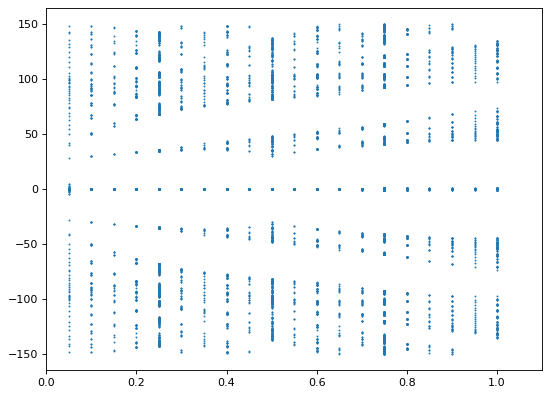

In [6]:
from matplotlib.pyplot import figure


fig = plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(xvals,totalList,s=0.5,alpha=1.0)

plt.xlim(-0.0,1.1)
fig.savefig('histogram_TBG_20_steps.pdf')

(-0.0, 1.1)

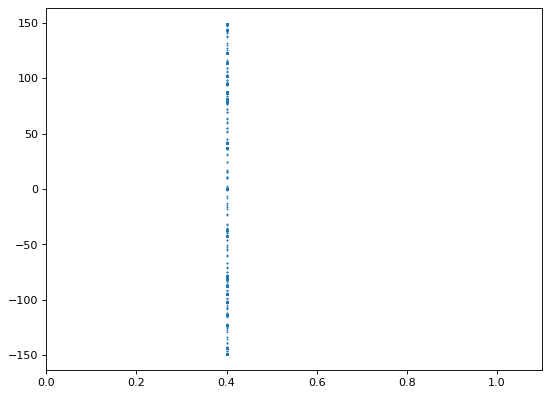

In [27]:
cutoff = 150
xvals = []
totalList = []
p=2
q = 5
gcdVal = gcd(p,q)
p = p // gcdVal
q = q // gcdVal
hist = np.load('rawData/data_'+str(p)+'_'+str(q)+'.npy')
pruned_hist = [i for i in hist if abs(i) < cutoff]
xvals = xvals + [(p+0.0)/q for i in range(len(pruned_hist))]
totalList = totalList + pruned_hist

from matplotlib.pyplot import figure


fig = plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(xvals,totalList,s=0.5,alpha=1.0)

plt.xlim(-0.0,1.1)